In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Add Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_df = pd.read_csv(city_data)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_df = pd.read_csv(ride_data)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12
5,South Latoya,2019-03-11 12:26,9.52,1.994999e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932084e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119539e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995623e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327642e+12


In [5]:
# 1. Inspecting the city dataframe

# Get the columns and the rows that are not null
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Double check there are no null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the Urban cities
sum(city_df["type"] == "Urban")

66

In [12]:
# Get the number of data points from the Suburban cities
sum(city_df["type"] == "Suburban")

36

In [13]:
# Get the number of data points from the Rural cities
sum(city_df["type"] == "Rural")

18

In [14]:
# 2. Inspecting the ride dataframe

# Get the columns and rows that are not null
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Double check there are no null values
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [17]:
# 3. Merge the 2 dataframes into 1

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display new dataframe
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12,46,Urban


In [18]:
# 4. Create DataFrames for each type of city

# Create the Urban city DataFrame
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12,46,Urban


In [20]:
# Create the Suburban city DataFrames
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.653623e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.575961e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.669117e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.706771e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.273047e+12,12,Suburban


In [21]:
# Create the Rural city DataFrames
rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985256e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421837e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269653e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018025e+12,2,Rural


In [22]:
# 5. Get the number of rides for each city type

# Get the number of rides for urban cities
urban_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides for suburban cities
suburban_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [24]:
# Get the number of rides for rural cities
rural_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [26]:
# 6. Get the average fare for each city type

# Get the average fare for each city in urban cities
urban_fare_avg = urban_df.groupby(["city"]).mean()["fare"]
urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# Get the average fare for each city in suburban cities
suburban_fare_avg = suburban_df.groupby(["city"]).mean()["fare"]
suburban_fare_avg.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [30]:
# Get the average fare for each city in rural cities
rural_fare_avg = rural_df.groupby(["city"]).mean()["fare"]
rural_fare_avg.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [31]:
# 7. Get the average number of drivers for each city type

# Get the average number of drivers for each urban city
urban_driver_avg = urban_df.groupby(["city"]).mean()["driver_count"]
urban_driver_avg.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [33]:
# Get the average number of drivers for each suburban city
suburban_driver_avg = suburban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_avg.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
# Get the average number of drivers for each rural city
rural_driver_avg = rural_df.groupby(["city"]).mean()["driver_count"]
rural_driver_avg.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

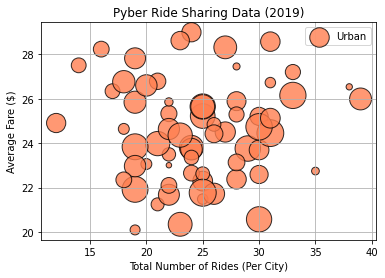

In [38]:
# 8. Create bubble charts for each type of city

# Create urban cities bubble chart
plt.scatter(urban_count, 
            urban_fare_avg,
            s=10*urban_driver_avg,
            color="coral",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Urban")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

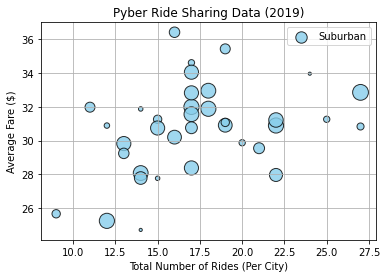

In [41]:
# Create suburban cities bubble chart
plt.scatter(suburban_count,
            suburban_fare_avg,
            s=10*suburban_driver_avg,
            color="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

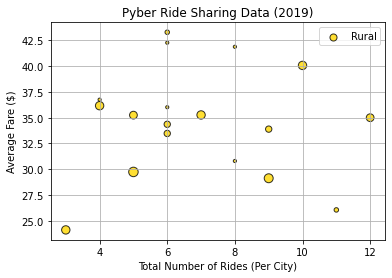

In [43]:
# Create rural cities bubble chart
plt.scatter(rural_count,
            rural_fare_avg,
            s=10*rural_driver_avg,
            color="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

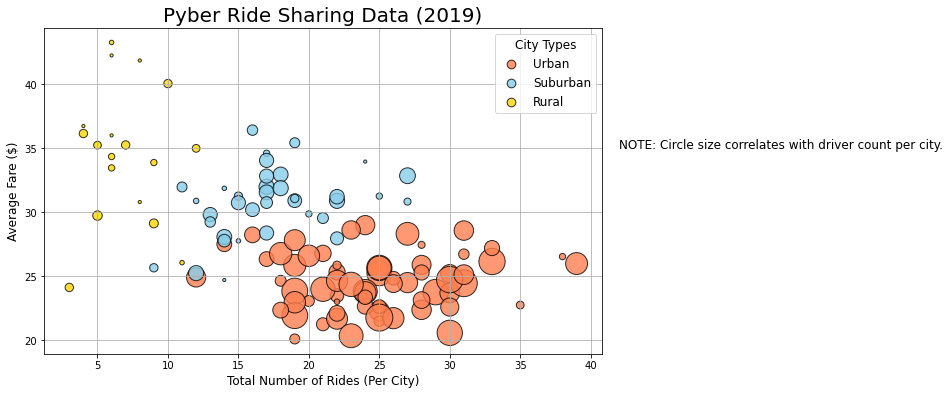

In [53]:
# 9. Combine each separate chart into 1 (combine the 3 scatter plot code blocks into 1 cell)

# Enlarge figure so that markers are spread out
plt.subplots(figsize=(10,6))

# Build out the combined scatter plot
plt.scatter(urban_count, 
            urban_fare_avg,
            s=10*urban_driver_avg,
            color="coral",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Urban")

plt.scatter(suburban_count,
            suburban_fare_avg,
            s=10*suburban_driver_avg,
            color="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")

plt.scatter(rural_count,
            rural_fare_avg,
            s=10*rural_driver_avg,
            color="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")

# Incorporate all other graph properties + format font size
plt.title("Pyber Ride Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Add the legend - add variable and legendHandles to set font size of the markers in the legend to a fixed size
lgnd = plt.legend(fontsize=12, mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text labal about circle size using plt.text(). 
# NOTE: numbers within brackets denote x and y coordinates where note will appear
plt.text(42, 35, "NOTE: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [54]:
# 10. Get summary statistics

# Summary stats for urban cities
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [55]:
# Summary stats for suburban cities
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [56]:
# Summary stats for rural cities
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [57]:
# Summary stats for ride count for urban cities
urban_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
# Summary stats for ride count for suburban cities
suburban_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [59]:
# Summary stats for ride count for rural cities
rural_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [60]:
# ALTERNATIVE: Getting only mean without getting the complete summary stats

# Calculate the mean of the ride count for each city type
round(urban_count.mean(), 2), round(suburban_count.mean(), 2), round(rural_count.mean(), 2)

(24.62, 17.36, 6.94)

In [61]:
# ALTERNATIVE: Getting only median without getting the complete summary stats

# Calculate the median of the ride count for each city type
round(urban_count.median(), 2), round(suburban_count.median(), 2), round(rural_count.median(), 2)

(24.0, 17.0, 6.0)

In [62]:
# ALTERNATIVE: Getting only mode without getting the complete summary stats

# Calculate the mode of the ride count for urban cities
urban_count.mode()

0    22
1    25
Name: ride_id, dtype: int64

In [63]:
# Calculate the mode of the ride count for suburban cities
suburban_count.mode()

0    17
Name: ride_id, dtype: int64

In [64]:
# Calculate the mode of the ride count for rural cities
rural_count.mode()

0    6
Name: ride_id, dtype: int64

In [75]:
# ALTERNATIVE: NumPy mean() and median() Functions and SciPy mode() function

# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [79]:
# Calculate the measures of central tendency for the ride count for urban cities

mean_urban_count = np.mean(urban_count)
mean_urban_count

24.62121212121212

In [80]:
median_urban_count = np.median(urban_count)
median_urban_count

24.0

In [81]:
mode_urban_count = sts.mode(urban_count)
mode_urban_count

ModeResult(mode=array([22], dtype=int64), count=array([7]))

In [84]:
# Calculate the measures of central tendency for the ride count for suburban cities

mean_suburban_count = np.mean(suburban_count)
mean_suburban_count

17.36111111111111

In [85]:
median_suburban_count = np.median(suburban_count)
median_suburban_count

17.0

In [86]:
mode_suburban_count = sts.mode(suburban_count)
mode_suburban_count

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [87]:
# Calculate the measures of central tendency for the ride count for rural cities

mean_rural_count = np.mean(rural_count)
mean_rural_count

6.944444444444445

In [88]:
median_rural_count = np.median(rural_count)
median_rural_count

6.0

In [89]:
mode_rural_count = sts.mode(rural_count)
mode_rural_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [90]:
# Get the fares for the urban cities
urban_fares = urban_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [96]:
# Get the fares for the suburban cities
suburban_fares = suburban_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [97]:
# Get the fares for the rural cities
rural_fares = rural_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [92]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
mean_urban_fares

24.52577230769236

In [91]:
median_urban_fares = np.median(urban_fares)
median_urban_fares

24.64

In [94]:
mode_urban_fares = sts.mode(urban_fares)
mode_urban_fares

ModeResult(mode=array([22.86]), count=array([5]))

In [98]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
mean_suburban_fares

30.97012800000002

In [99]:
median_suburban_fares = np.median(suburban_fares)
median_suburban_fares

30.75

In [100]:
mode_suburban_fares = sts.mode(suburban_fares)
mode_suburban_fares

ModeResult(mode=array([17.99]), count=array([3]))

In [101]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
mean_rural_fares

34.623440000000016

In [102]:
median_rural_fares = np.median(rural_fares)
median_rural_fares

37.05

In [103]:
mode_rural_fares = sts.mode(rural_fares)
mode_rural_fares

ModeResult(mode=array([37.05]), count=array([2]))

In [104]:
# Get the driver count for the urban cities
urban_drivers = urban_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [105]:
# Get the driver count for the suburban cities
suburban_drivers = suburban_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [106]:
# Get the driver count for the rural cities
rural_drivers = rural_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [107]:
# Calculate the measures of central tendency for the number of drivers for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
mean_urban_drivers

36.67815384615385

In [108]:
median_urban_drivers = np.median(urban_drivers)
median_urban_drivers

37.0

In [110]:
mode_urban_drivers = sts.mode(urban_drivers)
mode_urban_drivers

ModeResult(mode=array([39], dtype=int64), count=array([86]))

In [111]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
mean_suburban_drivers

13.712

In [112]:
median_suburban_drivers = np.median(suburban_drivers)
median_suburban_drivers

16.0

In [113]:
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_suburban_drivers

ModeResult(mode=array([20], dtype=int64), count=array([79]))

In [114]:
# Calculate the measures of central tendency for the number of drivers for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
mean_rural_drivers

4.296

In [115]:
median_rural_drivers = np.median(rural_drivers)
median_rural_drivers

4.0

In [116]:
mode_rural_drivers = sts.mode(rural_drivers)
mode_rural_drivers

ModeResult(mode=array([1], dtype=int64), count=array([32]))

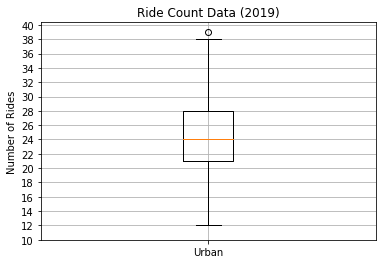

In [117]:
# 11. Box and whisker plots

# Create a box and whisker plot for the urban cities ride count (use ax.boxplot() function)
xlabels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_count, labels=xlabels)

# Add the titles, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

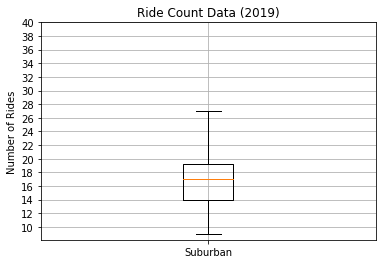

In [118]:
# Create a box and whisker plot for the suburban cities ride count (use ax.boxplot() function)
xlabels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_count, labels=xlabels)

# Add the titles, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

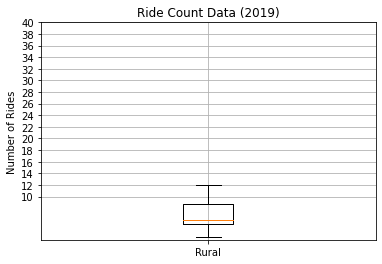

In [119]:
# Create a box and whisker plot for the rural cities ride count (use ax.boxplot() function)
xlabels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_count, labels=xlabels)

# Add the titles, y axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

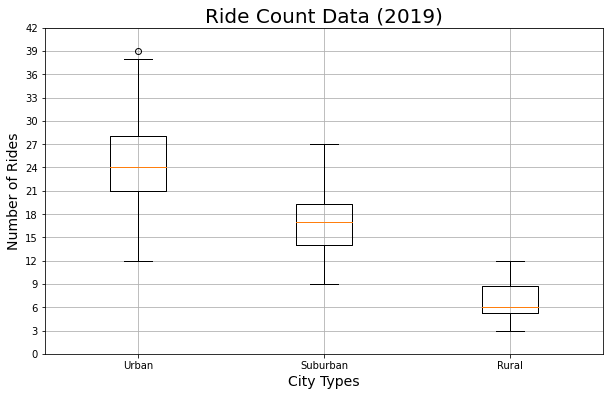

In [121]:
# Add all ride count box and whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count = [urban_count, suburban_count, rural_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")

plt.show()


In [122]:
# Get the city that has the number of rides = 39
urban_outlier = urban_count[urban_count==39].index[0]
urban_outlier

'West Angela'

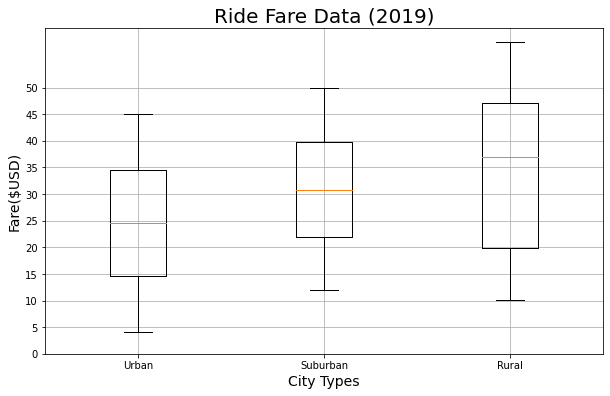

In [123]:
# Create box and whisker plot for ride fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fares = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,55, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")

plt.show()

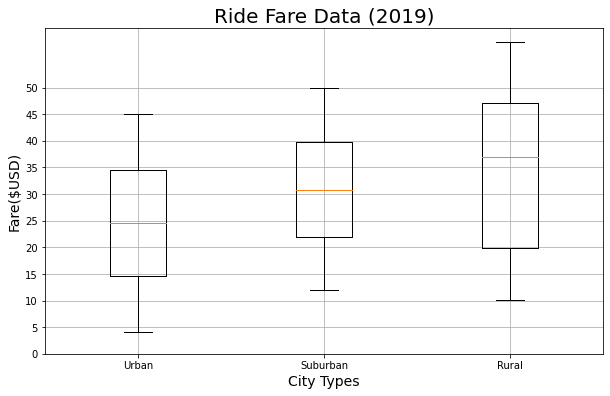

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [125]:
# Create box and whisker plot for driver count data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fares = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,55, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")

plt.show()
print("Summary Statistics")
urban_fares.describe()

In [126]:
print("Summary Statistics")
suburban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [127]:
print("Summary Statistics")
rural_fares.describe()

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

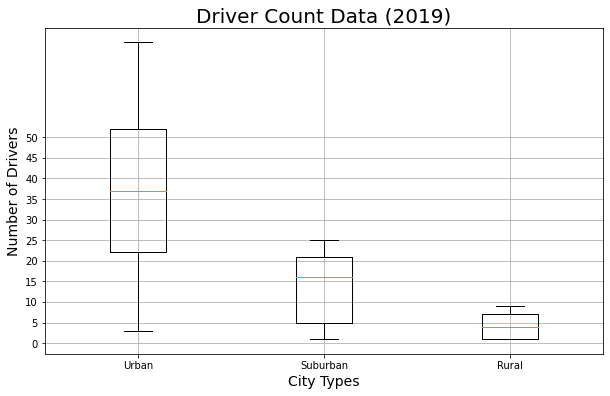

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [128]:
# Create box and whisker plot for driver count data
x_labels = ["Urban", "Suburban", "Rural"]
ride_drivers = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,55, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")

plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [129]:
print("Summary Statistics")
suburban_drivers.describe()

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [130]:
print("Summary Statistics")
rural_drivers.describe()

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [131]:
# 12. Percentage of fares for each city type pie chart

# Get the total fares for each city type
sum_fares_by_type = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [132]:
# Get the total fares 
total_fares = pyber_df["fare"].sum()
total_fares


63538.64

In [133]:
# Calculate the percentage of fare for each city type
type_percents = sum_fares_by_type/total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

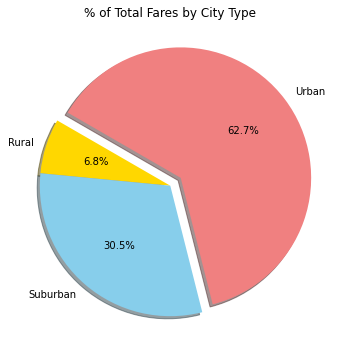

In [136]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=["gold", "skyblue", "lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        startangle=150,
        shadow=True)

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save figure
plt.savefig("analysis/Fig5.png")

plt.show()